# Examples of configuring and running NSGA-II

This notebook includes two examples where NSGA-II is used to solve a continuous and a binary multi-objective problems.

In [3]:
from jmetal.algorithm.multiobjective.nsgaii import NSGAII
from jmetal.operator.mutation import PolynomialMutation, BitFlipMutation
from jmetal.operator.crossover import SBXCrossover, SPXCrossover
from jmetal.util.solution import get_non_dominated_solutions
from jmetal.util.termination_criterion import StoppingByEvaluations

## Configure NSGA-II to solve a continuous problem (ZDT1)
### Indicate the problem to solve

In [4]:
from jmetal.problem import ZDT1

problem = ZDT1()

### Create an instance of NSGA-II

In [6]:
max_evaluations = 25000
algorithm = NSGAII(
        problem=problem,
        population_size=100,
        offspring_population_size=100,
        mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables(), distribution_index=20),
        crossover=SBXCrossover(probability=1.0, distribution_index=20),
        termination_criterion=StoppingByEvaluations(max_evaluations=max_evaluations),
)

### Run the algorithm and get the front found

In [8]:
algorithm.run()
front = get_non_dominated_solutions(algorithm.result())

[2024-06-22 10:23:06,510] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-22 10:23:06,516] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-22 10:23:06,518] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-22 10:23:06,519] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-06-22 10:23:09,500] [jmetal.core.algorithm] [DEBUG] Finished!


### Display the front

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
objectives = [solution.objectives for solution in front]

x = [_[0] for _ in objectives]
y = [_[1] for _ in objectives]

In [11]:
referenceFront = np.loadtxt("../resources/reference_front/ZDT1.pf", delimiter=' ')
referenceFront = referenceFront[referenceFront[:, 0].argsort()]

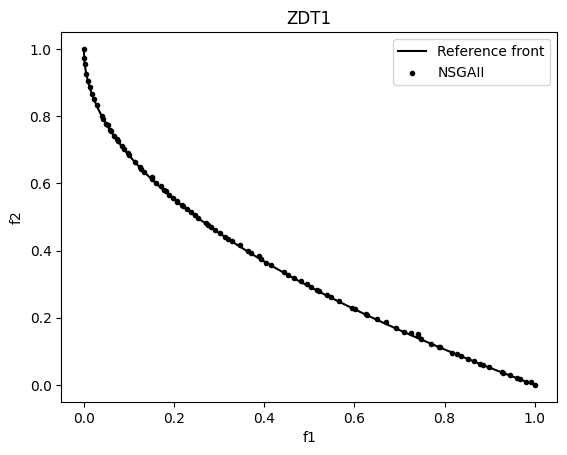

In [12]:
plt.plot(referenceFront[:,0], referenceFront[:,1], color="black")
plt.scatter(x, y, color="black", marker = '.')

plt.xlabel("f1")
plt.ylabel("f2")
plt.title(problem.name())
plt.legend(["Reference front" , "NSGAII"])

## Configure NSGA-II to solve a binary problem (OneZeroMax)

In [13]:
# The OneZeroMax problem consists of maximizing the number of zeros and the number of ones in a binary string
from jmetal.problem.multiobjective.unconstrained import OneZeroMax

bit_string_length = 512
problem = OneZeroMax(bit_string_length)

### Create an instance of NSGAII for binary problems¡

In [14]:
max_evaluations = 25000
algorithm = NSGAII(
        problem=problem,
        population_size=100,
        offspring_population_size=100,
        mutation=BitFlipMutation(probability=1.0 / bit_string_length),
        crossover=SPXCrossover(probability=1.0),
        termination_criterion=StoppingByEvaluations(max_evaluations=max_evaluations),
)

### Run the algorithm and get the front found

In [16]:
algorithm.run()
front = get_non_dominated_solutions(algorithm.result())

[2024-06-22 10:23:28,265] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-22 10:23:28,300] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-22 10:23:28,301] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-22 10:23:28,302] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-06-22 10:23:34,189] [jmetal.core.algorithm] [DEBUG] Finished!


### Display the front

In [17]:
objectives = [solution.objectives for solution in front]

x = [_[0] for _ in objectives]
y = [_[1] for _ in objectives]

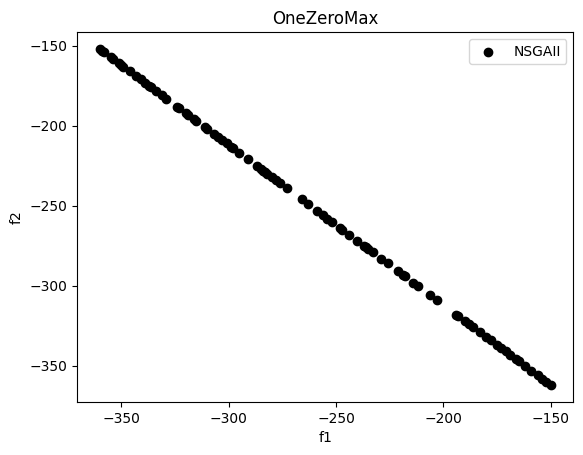

In [18]:
plt.scatter(x, y, color="black")

plt.xlabel("f1")
plt.ylabel("f2")
plt.title(problem.name())
plt.legend(["NSGAII"])